In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import timedelta

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('transactions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278932 entries, 0 to 278931
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   transaction_id        278932 non-null  object 
 1   user_id               278932 non-null  object 
 2   transaction_amount    278932 non-null  float64
 3   transaction_date      278932 non-null  object 
 4   merchant_id           278932 non-null  object 
 5   merchant_name         278932 non-null  object 
 6   merchant_category_id  278932 non-null  int64  
 7   geo_location          278932 non-null  object 
 8   payment_method        278932 non-null  object 
 9   user_agent            278932 non-null  object 
 10  loyalty_program       278932 non-null  object 
 11  discount_applied      278932 non-null  object 
 12  promo_amount          278932 non-null  float64
 13  transaction_notes     278932 non-null  object 
 14  merchant_rating       278932 non-null  int64  
 15  

In [3]:
df.describe()

,transaction_amount,merchant_category_id,promo_amount,merchant_rating
count,278932.000000,278932.000000,278932.000000,278932.00000
mean,50098.301378,5806.529964,4311.858087,3.80046
std,50021.138491,509.152141,16527.140346,1.16671
min,1000.000000,4722.000000,0.000000,1.00000
25%,14400.000000,5541.000000,0.000000,3.00000
50%,34800.000000,5812.000000,0.000000,4.00000
75%,69400.000000,5912.000000,0.000000,5.00000
max,587100.000000,8220.000000,422600.000000,5.00000


In [4]:
df.head()

,transaction_id,user_id,transaction_amount,transaction_date,merchant_id,merchant_name,merchant_category_id,geo_location,payment_method,user_agent,loyalty_program,discount_applied,promo_amount,transaction_notes,merchant_rating,transaction_status,is_refunded
0,4a71b7d1-34fa-45cf-b40a-a730d16ce617,U10578,23500.0,2024-05-09,M04936,Cox Inc,5732,"-7.974781, 112.633863",balance,Android 9,no,no,0.0,no,5,completed,no
1,b29665c0-8373-4ec1-a121-a041c77ffb51,U08353,150500.0,2024-05-30,M06359,"King, Rice and Ramirez",5812,"-6.188155, 106.817086",balance,iPhone; CPU iPhone OS 3_1_3 like Mac OS X,no,no,0.0,yes,2,completed,no
2,3e32187b-b374-4f1b-a64e-b1ebcc856563,U04564,65800.0,2024-03-08,M01710,"Lyons, Porter and Williams",5812,"-7.962043, 112.637274",credit_card,Android 2.0.1,no,no,0.0,no,3,completed,no
3,df8ad42e-aaf6-46d2-8d8f-1e291a4554bd,U22797,45600.0,2024-05-14,M02852,Smith Ltd,5411,"-6.592793, 106.806543",balance,iPad; CPU iPad OS 9_3_5 like Mac OS X,no,no,0.0,no,3,completed,no
4,334468df-4d71-4e4a-935c-32c17c306611,U18053,8500.0,2024-04-09,M00722,Bush Group,5411,"-6.269386, 106.979043",balance,Android 2.0.1,yes,no,0.0,no,4,completed,no


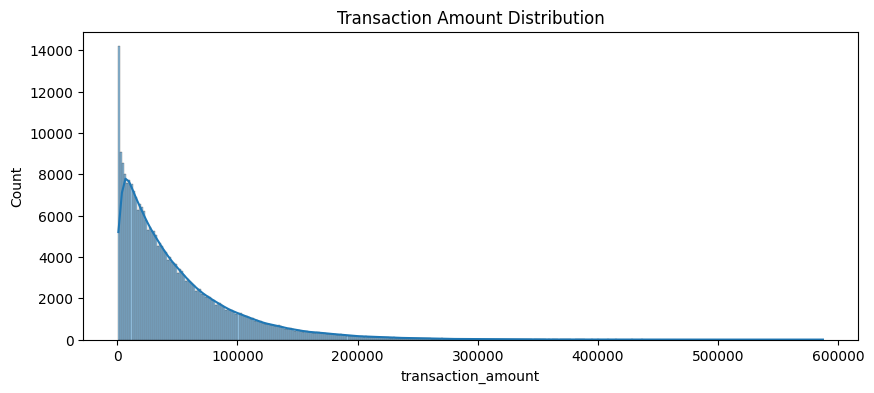

Skewness: 1.9927861024270515


In [5]:
plt.figure(figsize=(10,4))
sns.histplot(df['transaction_amount'], kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

print("Skewness:", df['transaction_amount'].skew())

In [6]:
df['user_agent'].unique()

array(['Android 9', 'iPhone; CPU iPhone OS 3_1_3 like Mac OS X',
       'Android 2.0.1', 'iPad; CPU iPad OS 9_3_5 like Mac OS X',
       'Android 3.2.2', 'Android 4.4.3', 'Android 5.0.1', 'Android 11',
       'iPad; CPU iPad OS 7_1_2 like Mac OS X', 'Android 7.1.1',
       'Android 3.2.3', 'Android 4.0.1', 'Android 13', 'Android 4.4.4',
       'Android 3.2.4', 'Android 4.1', 'Android 7.0', 'Android 7.1.2',
       'Android 8.1.0', 'iPhone; CPU iPhone OS 13_5_1 like Mac OS X',
       'iPhone; CPU iPhone OS 17_2_1 like Mac OS X',
       'iPhone; CPU iPhone OS 14_2 like Mac OS X',
       'iPhone; CPU iPhone OS 2_2_1 like Mac OS X',
       'iPad; CPU iPad OS 14_2_1 like Mac OS X', 'Android 4.0.2',
       'Android 4.2', 'Android 12.1', 'Android 1.5', 'Android 4.0.4',
       'Android 6.0.1', 'Android 3.2.5',
       'iPhone; CPU iPhone OS 16_7_6 like Mac OS X', 'Android 2.3.4',
       'Android 8.0.0', 'Android 2.3.1',
       'iPad; CPU iPad OS 10_3_3 like Mac OS X', 'Android 5.0',
       'Andr

In [7]:
num_duplicates = df.duplicated(subset=['transaction_id']).sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


findings:
- data is complete (there is no null).
- there is no duplicate transaction.
- there is no transaction amount bellow zero / min value.
- The transaction amount is "right-skewed" and needs to be transformed so that it is not too extreme in the mathematical calculations of the model.
- transaction_date is on object format (need to change to datetime).
- geo_location is on object format and need to separate to latitude and longitude.
- user_agent have so much unique data (cardinality) it possible to make noise because of minor version differences.

## Data Cleansing

In [8]:
df_new = df.copy()

convert 'transaction_date' to datetime format

In [9]:
df_new['transaction_date'] = pd.to_datetime(df_new['transaction_date'])

separate 'geo_location' to 'latitude' and 'longitude'

In [10]:
geo_split = df_new['geo_location'].str.split(',', expand=True)
df_new['latitude'] = geo_split[0].astype(float)
df_new['longitude'] = geo_split[1].astype(float)

df_new = df_new.drop(columns=['geo_location'])

print(df_new[['latitude', 'longitude']].head())

   latitude   longitude
0 -7.974781  112.633863
1 -6.188155  106.817086
2 -7.962043  112.637274
3 -6.592793  106.806543
4 -6.269386  106.979043


simplify 'user_agent' to reduce cardinality

In [11]:
def simplify_ua(ua_string):
    # Normalize to lowercase for easier matching
    ua_string = ua_string.lower()

    # Logic for Android
    if 'android' in ua_string:
        match = re.search(r'android\s+(\d+)', ua_string)
        version = match.group(1) if match else "Unknown"
        return f"Android {version}"

    # Logic for iPhone/iPad (iOS/iPadOS)
    elif 'iphone' in ua_string or 'ipad' in ua_string:
        device = "iPhone" if "iphone" in ua_string else "iPad"
        # Matches 'os 3_1_3' or 'os 14_2' and captures the first digit group
        match = re.search(r'os\s+(\d+)', ua_string)
        version = match.group(1) if match else "Unknown"
        return f"{device} OS {version}"

    return "Other"

df_new['device_category'] = df_new['user_agent'].apply(simplify_ua)
print(df_new[['user_agent', 'device_category']])

                                       user_agent device_category
0                                       Android 9       Android 9
1       iPhone; CPU iPhone OS 3_1_3 like Mac OS X     iPhone OS 3
2                                   Android 2.0.1       Android 2
3           iPad; CPU iPad OS 9_3_5 like Mac OS X       iPad OS 9
4                                   Android 2.0.1       Android 2
...                                           ...             ...
278927      iPad; CPU iPad OS 2_2_1 like Mac OS X       iPad OS 2
278928     iPad; CPU iPad OS 17_3_1 like Mac OS X      iPad OS 17
278929      iPad; CPU iPad OS 9_3_6 like Mac OS X       iPad OS 9
278930     iPad; CPU iPad OS 17_1_2 like Mac OS X      iPad OS 17
278931                                Android 4.3       Android 4

[278932 rows x 2 columns]


In [12]:
df_new['user_agent'].nunique()

136

In [13]:
df_new['device_category'].nunique()

48

In [14]:
df_new = df_new.drop(columns=['user_agent'])

Filter only successful transactions and not refunds

In [15]:
df_new = df_new[(df_new['transaction_status'] == 'completed') & (df_new['is_refunded'] == 'no')]

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251504 entries, 0 to 278931
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transaction_id        251504 non-null  object        
 1   user_id               251504 non-null  object        
 2   transaction_amount    251504 non-null  float64       
 3   transaction_date      251504 non-null  datetime64[ns]
 4   merchant_id           251504 non-null  object        
 5   merchant_name         251504 non-null  object        
 6   merchant_category_id  251504 non-null  int64         
 7   payment_method        251504 non-null  object        
 8   loyalty_program       251504 non-null  object        
 9   discount_applied      251504 non-null  object        
 10  promo_amount          251504 non-null  float64       
 11  transaction_notes     251504 non-null  object        
 12  merchant_rating       251504 non-null  int64         
 13  tran

In [17]:
df_new.head()

,transaction_id,user_id,transaction_amount,transaction_date,merchant_id,merchant_name,merchant_category_id,payment_method,loyalty_program,discount_applied,promo_amount,transaction_notes,merchant_rating,transaction_status,is_refunded,latitude,longitude,device_category
0,4a71b7d1-34fa-45cf-b40a-a730d16ce617,U10578,23500.0,2024-05-09,M04936,Cox Inc,5732,balance,no,no,0.0,no,5,completed,no,-7.974781,112.633863,Android 9
1,b29665c0-8373-4ec1-a121-a041c77ffb51,U08353,150500.0,2024-05-30,M06359,"King, Rice and Ramirez",5812,balance,no,no,0.0,yes,2,completed,no,-6.188155,106.817086,iPhone OS 3
2,3e32187b-b374-4f1b-a64e-b1ebcc856563,U04564,65800.0,2024-03-08,M01710,"Lyons, Porter and Williams",5812,credit_card,no,no,0.0,no,3,completed,no,-7.962043,112.637274,Android 2
3,df8ad42e-aaf6-46d2-8d8f-1e291a4554bd,U22797,45600.0,2024-05-14,M02852,Smith Ltd,5411,balance,no,no,0.0,no,3,completed,no,-6.592793,106.806543,iPad OS 9
4,334468df-4d71-4e4a-935c-32c17c306611,U18053,8500.0,2024-04-09,M00722,Bush Group,5411,balance,yes,no,0.0,no,4,completed,no,-6.269386,106.979043,Android 2


## Exploratory Data Analysis (After Data Cleansing)

In [18]:
group1 = df_new.groupby('device_category')['transaction_amount'].mean().sort_values(ascending=False)

/tmp/ipython-input-3205420379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group1.values, y=group1.index, palette="viridis")


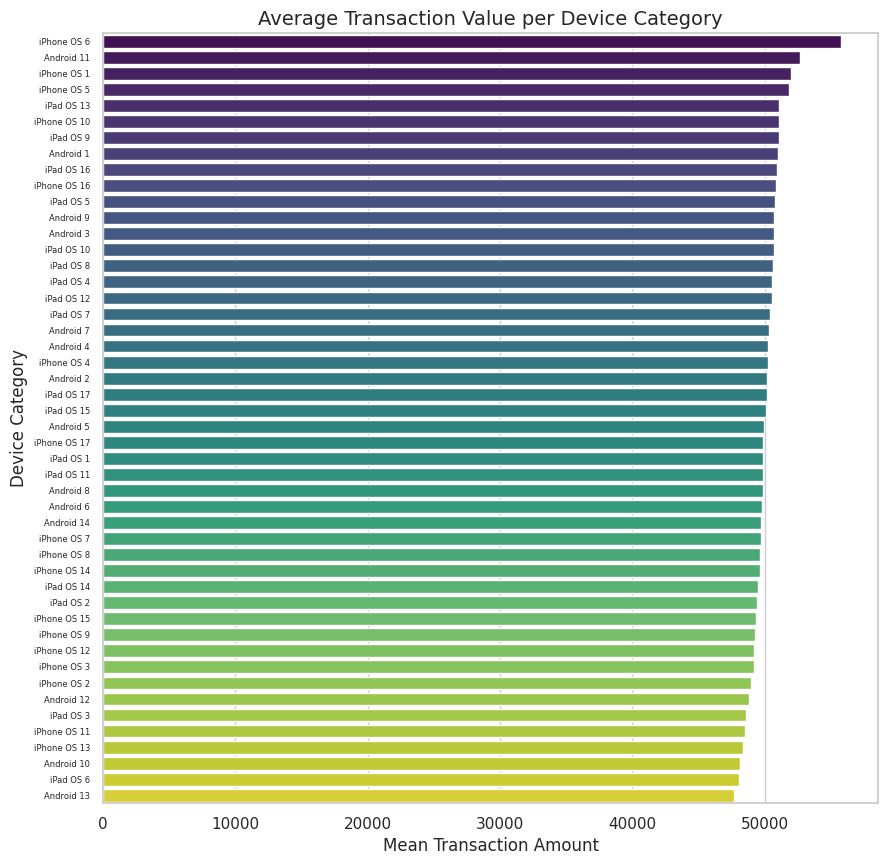

In [19]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 10))

sns.barplot(x=group1.values, y=group1.index, palette="viridis")

plt.title('Average Transaction Value per Device Category', fontsize=14)
plt.xlabel('Mean Transaction Amount', fontsize=12)
plt.ylabel('Device Category', fontsize=12)
plt.yticks(fontsize=6)

plt.show()

It can be seen that most devices with older versions tend to have a high average transaction amount

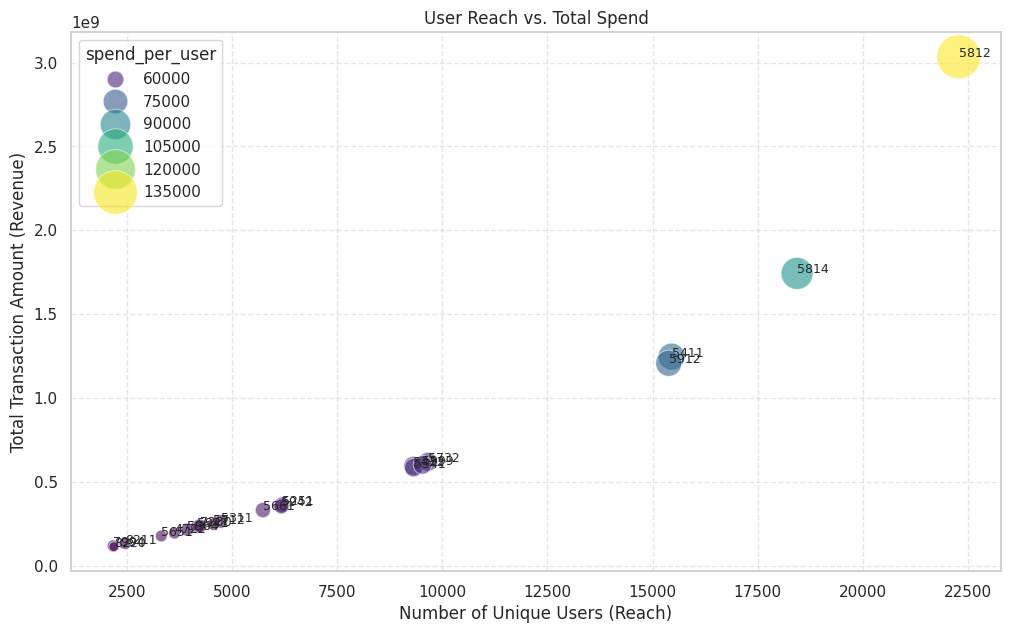

In [20]:
# Aggregate the data by Merchant Category
category_analysis = df_new.groupby('merchant_category_id').agg({
    'user_id': 'nunique',             # Count unique customers
    'transaction_amount': 'sum',      # Total revenue
    'transaction_id': 'count'         # Total number of transactions
}).reset_index()


category_analysis.columns = ['mcc', 'unique_users', 'total_spend', 'tx_count']

# Calculate an extra metric: Average Spend per User
category_analysis['spend_per_user'] = category_analysis['total_spend'] / category_analysis['unique_users']

plt.figure(figsize=(12, 7))

# The size of the bubble represents the average spend per user
sns.scatterplot(
    data=category_analysis,
    x='unique_users',
    y='total_spend',
    size='spend_per_user',
    sizes=(50, 1000),
    alpha=0.6,
    hue='spend_per_user',
    palette='viridis'
)

# Add Labels to the points
for i in range(category_analysis.shape[0]):
    plt.text(
        category_analysis.unique_users[i]+0.2,
        category_analysis.total_spend[i],
        str(int(category_analysis.mcc[i])),
        fontsize=9
    )

plt.title('User Reach vs. Total Spend')
plt.xlabel('Number of Unique Users (Reach)')
plt.ylabel('Total Transaction Amount (Revenue)')
plt.grid(True, linestyle='--', alpha=0.5)

It can be seen that restaurants (MCC 5812) and fast food (MCC 5814) which are included in daily needs have the highest revenue and reach values.

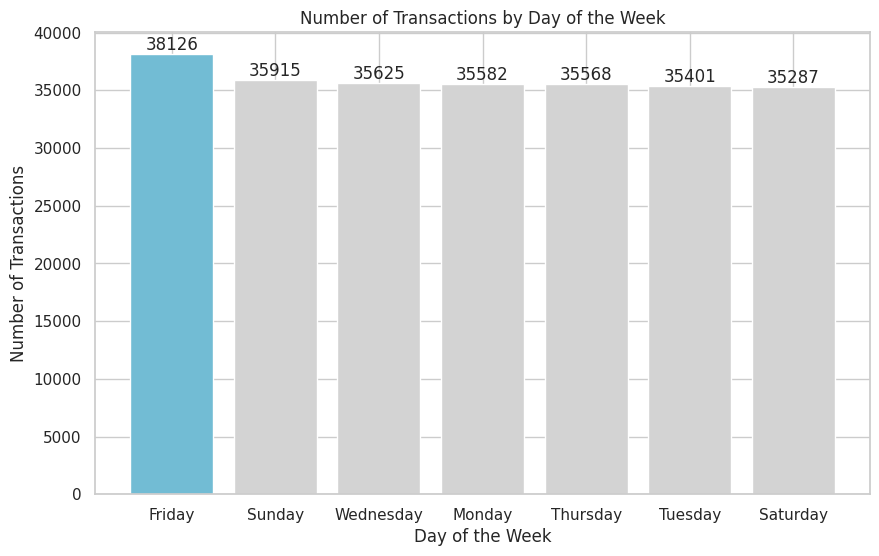

In [21]:
df_temp = df_new.copy()
df_temp['day_of_week'] = df_temp['transaction_date'].dt.day_name()
transactions_by_day = df_temp.groupby(['day_of_week']).size().sort_values(ascending=False).reset_index(name='number_of_transactions')

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 6))
bars = plt.bar(transactions_by_day['day_of_week'], transactions_by_day['number_of_transactions'], color=colors)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Day of the Week')
plt.xticks()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')
plt.show()

It can be seen that many transactions are carried out on weekends (except Saturdays), which can be an indication that the majority of users are office workers or people who have permanent jobs.

## Features Engineering

Age Feature Engineer:

To quantify user demographics without direct identifiers, I’ve structured a weighted scoring model that treats hardware lifecycle, consumption patterns, and purchasing power as proxies for age.
- This model calculates the degree of device "newness" through the detected operating system version. Users with the latest OS (such as Android 14 or iOS 17) are classified as "Early Tech Adopters," which are statistically dominated by younger age groups. Conversely, the use of older (Legacy) OS versions often correlates with older age groups or individuals with slower device replacement cycles.
- I assign "Age Points" to specific Merchant Category Codes (MCCs) based on lifestyle relevance. Categories like Fast Food (MCC 5814) and Video Game Establishments (MCC 7994) are weighted toward the "Youth/Student" profile. Meanwhile, spending on Pharmacies (MCC 5912), Furniture Stores (MCC 5712), or Travel Agencies (MCC 4722) is weighted more heavily toward the "Mature" or "Senior" profile, reflecting household spending and health priorities.. [https://usa.visa.com/content/dam/VCOM/download/merchants/visa-merchant-data-standards-manual.pdf]
- Integrating average spending per transaction as an additional signal. This approach is based on economic trends where disposable income and average transaction value tend to increase with career advancement and maturity (peaking in the Established Adult group).
- average these scores per user to place them into a bin:
  - Gen Z / Student (18–24)
  - Young Professional (25–35)
  - Established Adult (36–55)
  - Senior (55+)

In [22]:
df_new['merchant_category_id'].unique()

array([5732, 5812, 5411, 5814, 5964, 5311, 5999, 5912, 5541, 5942, 5661,
       7230, 5712, 5651, 8220, 5412, 5941, 8211, 4722, 5251, 7994])

In [23]:
# Lower score = Younger, Higher score = Older
age_mcc_map = {
    '5732': 2, # Electronic Stores - General
    '5812': 2, # Restaurants - General
    '5411': 3, # Grocery/Supermarket - Likely Adult/Family
    '5814': 1, # Fast Food - Likely Younger
    '5964': 3, # Catalog Merchant - Likely Younger
    '5311': 3, # Department Store - Likely Adult/Family
    '5999': 3, # Miscellaneous and Specialty Retail Stores - Likely Adult/Family
    '5912': 4, # Drug Stores and Pharmacies - Likely Older
    '5541': 3, # Service Stations - Likely Adult
    '5942': 2, # Book Stores - General
    '7230': 2, # Beauty and Barber Shops - General
    '5661': 2, # Shoe Stores - General
    '5712': 3, # Furniture, Home Furnishings, and Equipment Stores - Likely Adult
    '5651': 2, # Family Clothing Stores - General
    '8220': 3, # Colleges, Universities, Professional Schools, and Junior Colleges - General
    '5412': 3, # Caterers - Likely Adult
    '5941': 2, # Sporting Goods Stores - General
    '8211': 3, # Elementary and Secondary Schools - Likely Adult
    '4722': 2, # Travel Agencies and Tour Operators - General
    '5251': 3, # Hardware Stores - Likely Adult
    '7994': 1, # Video Game Arcades/Establishments - Likely Younger
}

# Give higher points to very old OS versions
def get_device_age_score(ua):
    ua = ua.lower()

    if 'android' in ua:
        version = int(''.join(filter(str.isdigit, ua)) or 10)
        return 1 if version >= 13 else (2 if version >= 10 else 4)
    if 'iphone' in ua or 'ipad' in ua:
        version = int(''.join(filter(str.isdigit, ua)) or 15)
        return 1 if version >= 16 else (2 if version >= 13 else 4)
    return 3

def engineer_age(df):
    # Apply MCC Scoring
    df = df.copy()
    df['mcc_age_score'] = df['merchant_category_id'].astype(str).map(age_mcc_map).fillna(2.5)

    # Apply Device Scoring
    df['device_age_score'] = df['device_category'].apply(get_device_age_score)

    # Aggregate per user
    user_age_profile = df.groupby('user_id').agg({
        'mcc_age_score': 'mean',
        'device_age_score': 'mean',
        'transaction_amount': 'mean'
    }).reset_index()

    # Aggregate per user
    user_age_profile = df.groupby('user_id').agg({
        'mcc_age_score': 'mean',
        'device_age_score': 'mean',
        'transaction_amount': 'mean'
    }).reset_index()

    # Use log to prevent high value affect distribution
    amount_log = np.log1p(user_age_profile['transaction_amount'])

    # Min-max scaling to make the range equal to the MCC and Device scores
    min_val = amount_log.min()
    max_val = amount_log.max()

    if max_val != min_val:
        user_age_profile['amount_age_score'] = 1 + (amount_log - min_val) * (4 - 1) / (max_val - min_val)
    else:
        user_age_profile['amount_age_score'] = 2.5

    # Calculate Final Composite Score MCC (40%), Device (40%), Amount (20%)
    user_age_profile['final_age_score'] = (
        (user_age_profile['mcc_age_score'] * 0.4) +
        (user_age_profile['device_age_score'] * 0.4) +
        (user_age_profile['amount_age_score'] * 0.2)
    )

    # Binning into Categories
    conditions = [
        (user_age_profile['final_age_score'] < 1.8),
        (user_age_profile['final_age_score'] < 2.5),
        (user_age_profile['final_age_score'] < 3.5),
        (user_age_profile['final_age_score'] >= 3.5)
    ]
    choices = ['Gen Z / Student', 'Young Professional', 'Established Adult', 'Senior']
    user_age_profile['age_feature'] = np.select(conditions, choices, default='Unknown')

    return user_age_profile

user_age_df = engineer_age(df_new)

In [24]:
user_age_df.describe()

,mcc_age_score,device_age_score,transaction_amount,amount_age_score,final_age_score
count,24321.000000,24321.000000,24321.000000,24321.000000,24321.000000
mean,2.391644,3.428889,50105.099179,3.216070,2.971427
std,0.281155,1.089786,16391.161998,0.200651,0.452217
min,1.000000,1.000000,1100.000000,1.000000,1.586990
25%,2.200000,4.000000,38633.333333,3.095344,2.980027
50%,2.388889,4.000000,48564.285714,3.230070,3.159435
75%,2.571429,4.000000,59600.000000,3.350660,3.252847
max,4.000000,4.000000,179514.285714,4.000000,3.770633


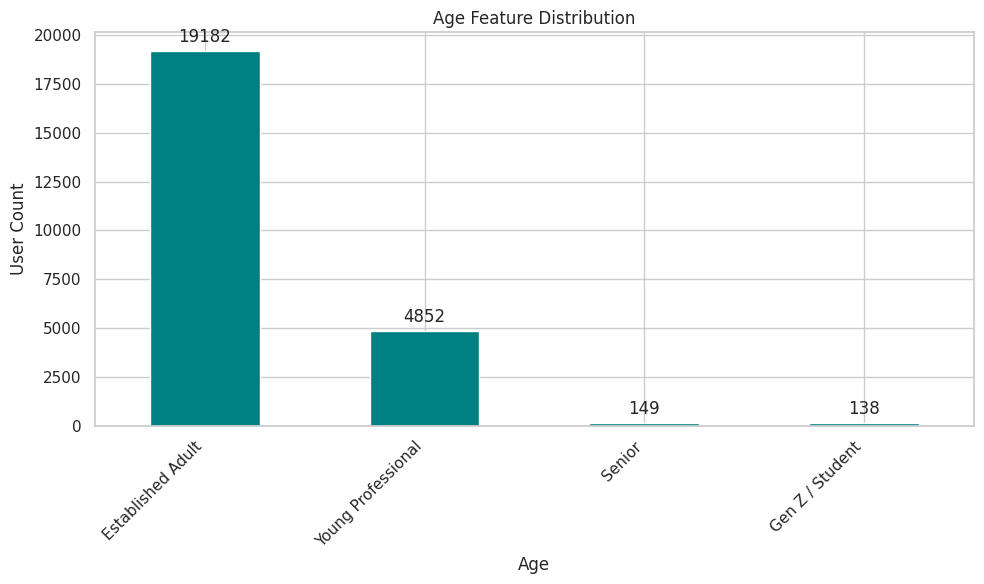

In [25]:
user_age_counts = user_age_df['age_feature'].value_counts().sort_values(ascending=False)

ax = user_age_counts.plot(kind='bar', color='teal', figsize=(10, 6))
ax.set_title('Age Feature Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('User Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [26]:
merge_df = pd.merge(df_new, user_age_df[['user_id', 'age_feature']], on='user_id', how='left')
merge_df.head()

,transaction_id,user_id,transaction_amount,transaction_date,merchant_id,merchant_name,merchant_category_id,payment_method,loyalty_program,discount_applied,promo_amount,transaction_notes,merchant_rating,transaction_status,is_refunded,latitude,longitude,device_category,age_feature
0,4a71b7d1-34fa-45cf-b40a-a730d16ce617,U10578,23500.0,2024-05-09,M04936,Cox Inc,5732,balance,no,no,0.0,no,5,completed,no,-7.974781,112.633863,Android 9,Established Adult
1,b29665c0-8373-4ec1-a121-a041c77ffb51,U08353,150500.0,2024-05-30,M06359,"King, Rice and Ramirez",5812,balance,no,no,0.0,yes,2,completed,no,-6.188155,106.817086,iPhone OS 3,Established Adult
2,3e32187b-b374-4f1b-a64e-b1ebcc856563,U04564,65800.0,2024-03-08,M01710,"Lyons, Porter and Williams",5812,credit_card,no,no,0.0,no,3,completed,no,-7.962043,112.637274,Android 2,Established Adult
3,df8ad42e-aaf6-46d2-8d8f-1e291a4554bd,U22797,45600.0,2024-05-14,M02852,Smith Ltd,5411,balance,no,no,0.0,no,3,completed,no,-6.592793,106.806543,iPad OS 9,Established Adult
4,334468df-4d71-4e4a-935c-32c17c306611,U18053,8500.0,2024-04-09,M00722,Bush Group,5411,balance,yes,no,0.0,no,4,completed,no,-6.269386,106.979043,Android 2,Established Adult


Gender Feature Engineer:

In the absence of ground-truth demographic data, I utilized Merchant Category Affinity as the primary signal for gender inference, supplemented by a secondary weighting for promotion-sensitive behavior. I opted for a probabilistic scoring method to acknowledge the inherent uncertainty in behavioral proxies.
- This model assigns "Gender Points" to specific Merchant Category Codes (MCCs) that statistically have a strong gender bias. For example, transactions in Beauty & Barber Shops (MCC 7230) is weighted toward feminine scores, while transactions in Hardware Stores (MCC 5251) is weighted toward masculine scores.
- Based on consumer behavior research showing a tendency for differences in sensitivity to price incentives, this model integrates the discount_applied feature. Higher coupon usage frequency and higher promotional response are used as weighted factors to identify shopping profiles that are traditionally more dominant in the female segment (coupon/discount orientation). [https://www.paymentsense.com/uk/blog/men-vs-women-online/#:~:text=2.,SALE%20signs%20in%20shop%20fronts.]
- All signals are processed through aggregation per user_id to create a weighted average value. The final step involves binning the probabilities into categories: Likely Male, Likely Female, or Neutral/Undetermined.

In [27]:
# 1.0 = Highly likely Female, 0.0 = Highly likely Male, 0.5 = Neutral
gender_mcc_map = {
    '7230': 0.8, # Beauty/Barber - often trends female in higher frequency
    '5651': 0.6, # Family Clothing - often female (primary household shopper)
    '5541': 0.3, # Gas Stations - slightly trends male
    '5251': 0.2, # Hardware Stores - slightly trends male
    '7994': 0.3, # Video Games - slightly trends male
}

def engineer_gender(df):
    df = df.copy()

    # Map the MCC scores
    df['gender_score'] = df['merchant_category_id'].astype(str).map(gender_mcc_map).fillna(0.5)

    # If discount_applied is 'yes', nudge the score up by 0.05
    df.loc[df['discount_applied'] == 'yes', 'gender_score'] += 0.05

    # Aggregate by user
    user_gender = df.groupby('user_id')['gender_score'].mean().reset_index()

    # Final Classification
    user_gender['gender_feature'] = user_gender['gender_score'].apply(
        lambda x: 'Likely Female' if x > 0.55 else ('Likely Male' if x < 0.45 else 'Undetermined')
    )

    return user_gender

user_gender_df = engineer_gender(df_new)

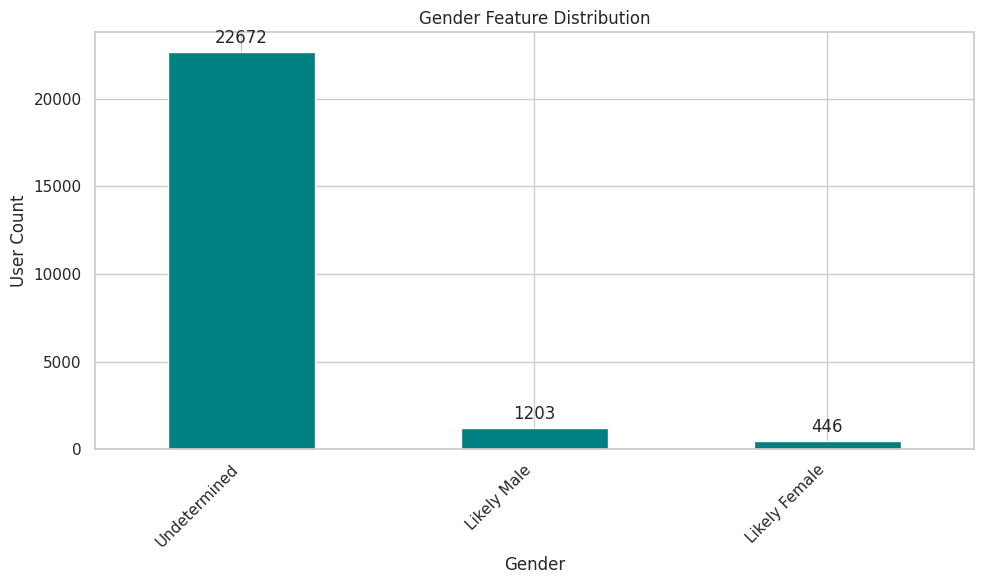

In [28]:
user_gender_counts = user_gender_df['gender_feature'].value_counts().sort_values(ascending=False)

ax = user_gender_counts.plot(kind='bar', color='teal', figsize=(10, 6))
ax.set_title('Gender Feature Distribution')
ax.set_xlabel('Gender')
ax.set_ylabel('User Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [29]:
merge_df = pd.merge(merge_df, user_gender_df[['user_id', 'gender_feature']], on='user_id', how='left')
merge_df.head()

,transaction_id,user_id,transaction_amount,transaction_date,merchant_id,merchant_name,merchant_category_id,payment_method,loyalty_program,discount_applied,promo_amount,transaction_notes,merchant_rating,transaction_status,is_refunded,latitude,longitude,device_category,age_feature,gender_feature
0,4a71b7d1-34fa-45cf-b40a-a730d16ce617,U10578,23500.0,2024-05-09,M04936,Cox Inc,5732,balance,no,no,0.0,no,5,completed,no,-7.974781,112.633863,Android 9,Established Adult,Undetermined
1,b29665c0-8373-4ec1-a121-a041c77ffb51,U08353,150500.0,2024-05-30,M06359,"King, Rice and Ramirez",5812,balance,no,no,0.0,yes,2,completed,no,-6.188155,106.817086,iPhone OS 3,Established Adult,Undetermined
2,3e32187b-b374-4f1b-a64e-b1ebcc856563,U04564,65800.0,2024-03-08,M01710,"Lyons, Porter and Williams",5812,credit_card,no,no,0.0,no,3,completed,no,-7.962043,112.637274,Android 2,Established Adult,Undetermined
3,df8ad42e-aaf6-46d2-8d8f-1e291a4554bd,U22797,45600.0,2024-05-14,M02852,Smith Ltd,5411,balance,no,no,0.0,no,3,completed,no,-6.592793,106.806543,iPad OS 9,Established Adult,Undetermined
4,334468df-4d71-4e4a-935c-32c17c306611,U18053,8500.0,2024-04-09,M00722,Bush Group,5411,balance,yes,no,0.0,no,4,completed,no,-6.269386,106.979043,Android 2,Established Adult,Undetermined


Income Level Feature Enginner:

To estimate user economic stratification without official income data, I built a weighted scoring model that utilizes transaction context, device asset ownership, and promotion sensitivity as proxies for income level.
- Rather than simply looking at the absolute value of a transaction, the model calculates how far a user's spending deviates from the average for that merchant category. A Rp.2,000,000 (assuming in rupiah units) transaction at a fast food restaurant (MCC 5814) is considered an indicator of very high disposable income, while the same amount at a travel agency (MCC 4722) is considered typical spending behavior for middle class.
- Using device_category to map the device hierarchy. This model places the highest weight on the Apple ecosystem (iPhone/iPad), with the latest OS versions (v13+) as an indicator of premium purchasing power. Flagship Android devices (versions 11+) occupy the upper-middle position, while single-digit OS versions (legacy) are considered a proxy for lower economic segments or users who do not prioritize device updates.
- Setting “Income Points”, for example categories like Airlines, Luxury Retail, and Car Dealers get the maximum score, while the basic needs category serves as the lower-middle income baseline.
- Analyzing the ratio of promotional use to total spending. A low reliance on discounts (promo_amount) coupled with active participation in loyalty programs is used to identify high-income users who prioritize convenience and exclusivity over price efficiency.
- All of the above variables are aggregated per user using a weighted average to place them into a category: Low Income, Middle Income, or High Income.

In [30]:
# Mapping MCC to Income Score (1 = Low, 5 = High)
income_mcc_map = {
    '4722': 5, # Travel Agencies and Tour Operators
    '5812': 4, # Restaurants (Fine Dining)
    '5814': 2, # Fast Food (High volume usually lower-mid income)
    '5411': 3, # Grocery/Supermarket (Baseline)
    '5311': 4, # Department Stores
    '7994': 4, # Video Game Arcades/Establishments
    '8220': 4, # Colleges, Universities
    '5712': 4, # Furniture, Home Furnishings, and Equipment Stores
}

def get_device_income_score(ua):
    ua = ua.lower()

    # Extract version number from device category
    version_digits = ''.join(filter(str.isdigit, ua))
    version = int(version_digits[:2]) if version_digits else 0 # Take the first 2 numbers for the tens version

    # For iPhone and iPad (Premium Segment)
    if 'iphone' in ua or 'ipad' in ua:
        # Iphone versions 10+ (iOS 13, 14, 15, 16, 17+) are given the highest score (5)
        if version >= 13:
            return 5.0
        # The old version was given a medium-high score (4) because of Apple's brand value.
        else:
            return 4.0

    # For Android (Mass Segment)
    if 'android' in ua:
        # Android versions 10+ (Android 11, 12, 13+) are given an upper-middle score (4)
        if version >= 11:
            return 4.0
        # Older versions of Android are given a medium score (3)
        else:
            return 3.0

    # Default
    return 3.5

def engineer_income(df):
    df = df.copy()

    # MCC Income Score
    df['mcc_income_score'] = df['merchant_category_id'].astype(str).map(income_mcc_map).fillna(3)

    # Contextual Spending Outlier (normalization per category)
    # Calculate the average transaction per merchant category
    category_means = df.groupby('merchant_category_id')['transaction_amount'].transform('mean')
    # If transactions are well above the category average (e.g. 5814/Fast Food), the income score increases.
    df['spending_context_score'] = df['transaction_amount'] / category_means
    # Clip so it's not too extreme (range 1-5)
    df['spending_context_score'] = df['spending_context_score'].clip(1, 5)

    # Device Income Score
    df['device_income_score'] = df['device_category'].apply(get_device_income_score)

    # Promo & Loyalty Features (Per User)
    # Agregate to user level
    user_income_profile = df.groupby('user_id').agg({
        'mcc_income_score': 'mean',
        'spending_context_score': 'mean',
        'device_income_score': 'mean',
        'transaction_amount': 'sum',
        'promo_amount': 'sum',
        'loyalty_program': lambda x: 1 if (x == 'yes').any() else 0
    }).reset_index()

    # Promo Sensitivity (Inverse: The more promos you use, the lower your income score will be)
    # Promo ratio to total spending
    user_income_profile['promo_ratio'] = user_income_profile['promo_amount'] / (user_income_profile['transaction_amount'] + 1)
    # Reverse the value: Low promo ratio = High income score (1-5)
    user_income_profile['promo_score'] = 5 - (user_income_profile['promo_ratio'].clip(0, 1) * 4)

    # Final Composite Score
    # Weight: Contextual Spending (30%), MCC (30%), Device (20%), Promo Sensitivity (10%), Loyalty (10%)
    user_income_profile['final_income_score'] = (
        (user_income_profile['spending_context_score'] * 0.3) +
        (user_income_profile['mcc_income_score'] * 0.3) +
        (user_income_profile['device_income_score'] * 0.2) +
        (user_income_profile['promo_score'] * 0.1) +
        (user_income_profile['loyalty_program'] * 5 * 0.1)
    )

    # Binning into Income Levels
    conditions = [
        (user_income_profile['final_income_score'] < 2.2),
        (user_income_profile['final_income_score'] < 3.2),
        (user_income_profile['final_income_score'] >= 3.2),
    ]
    choices = ['Low Income', 'Middle Income', 'High Income']
    user_income_profile['income_level'] = np.select(conditions, choices, default='Middle')

    return user_income_profile

user_income_df = engineer_income(df_new)

In [31]:
user_income_df.describe()

,mcc_income_score,spending_context_score,device_income_score,transaction_amount,promo_amount,loyalty_program,promo_ratio,promo_score,final_income_score
count,24321.000000,24321.000000,24321.000000,2.432100e+04,24321.000000,24321.000000,24321.000000,24321.000000,24321.000000
mean,3.193640,1.360391,3.548621,5.186125e+05,44617.762428,0.241067,0.085817,4.656734,2.662140
std,0.224742,0.240278,0.757549,2.279506e+05,55204.113919,0.427740,0.099165,0.396658,0.283956
min,2.000000,1.000000,3.000000,1.100000e+03,0.000000,0.000000,0.000000,1.343948,1.827966
25%,3.000000,1.183070,3.000000,3.537000e+05,3600.000000,0.000000,0.007976,4.484560,2.435508
50%,3.200000,1.323262,3.000000,4.926000e+05,25200.000000,0.000000,0.052862,4.788550,2.593772
75%,3.333333,1.495436,4.000000,6.581000e+05,65000.000000,0.000000,0.128860,4.968094,2.864040
max,4.333333,3.247415,5.000000,1.784800e+06,490000.000000,1.000000,0.914013,5.000000,3.742273


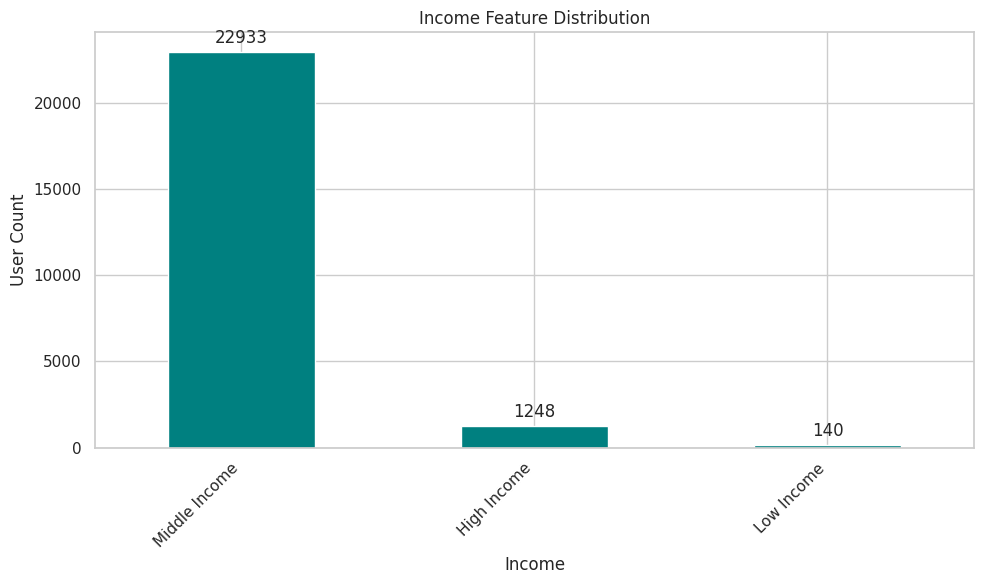

In [32]:
user_income_counts = user_income_df['income_level'].value_counts().sort_values(ascending=False)

ax = user_income_counts.plot(kind='bar', color='teal', figsize=(10, 6))
ax.set_title('Income Feature Distribution')
ax.set_xlabel('Income')
ax.set_ylabel('User Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [33]:
merge_df = pd.merge(merge_df, user_income_df[['user_id', 'income_level']], on='user_id', how='left')
merge_df.head()

,transaction_id,user_id,transaction_amount,transaction_date,merchant_id,merchant_name,merchant_category_id,payment_method,loyalty_program,discount_applied,...,transaction_notes,merchant_rating,transaction_status,is_refunded,latitude,longitude,device_category,age_feature,gender_feature,income_level
0,4a71b7d1-34fa-45cf-b40a-a730d16ce617,U10578,23500.0,2024-05-09,M04936,Cox Inc,5732,balance,no,no,...,no,5,completed,no,-7.974781,112.633863,Android 9,Established Adult,Undetermined,Middle Income
1,b29665c0-8373-4ec1-a121-a041c77ffb51,U08353,150500.0,2024-05-30,M06359,"King, Rice and Ramirez",5812,balance,no,no,...,yes,2,completed,no,-6.188155,106.817086,iPhone OS 3,Established Adult,Undetermined,Middle Income
2,3e32187b-b374-4f1b-a64e-b1ebcc856563,U04564,65800.0,2024-03-08,M01710,"Lyons, Porter and Williams",5812,credit_card,no,no,...,no,3,completed,no,-7.962043,112.637274,Android 2,Established Adult,Undetermined,Middle Income
3,df8ad42e-aaf6-46d2-8d8f-1e291a4554bd,U22797,45600.0,2024-05-14,M02852,Smith Ltd,5411,balance,no,no,...,no,3,completed,no,-6.592793,106.806543,iPad OS 9,Established Adult,Undetermined,Middle Income
4,334468df-4d71-4e4a-935c-32c17c306611,U18053,8500.0,2024-04-09,M00722,Bush Group,5411,balance,yes,no,...,no,4,completed,no,-6.269386,106.979043,Android 2,Established Adult,Undetermined,Middle Income


Working Status Feature Engineer:

In the absence of direct working status labels, I designed an inference model based on Temporal-Spatial Routine and Financial Responsibility to differentiate users based on their work rhythm and financial stability.
- This model analyzes the distribution of transaction times to distinguish schedule flexibility. Users who concentrate non-essential transactions (outside of emergencies like gas/fast food) on weekends are identified as full-time professionals. Conversely, shopping activity evenly distributed throughout weekdays indicates the time flexibility typically enjoyed by freelancers or students/unemployed individuals.
- Using payment method type as a signal of income stability. Credit card use is given higher weight for permanent workers or established freelancers, as ownership of these instruments typically requires verification of stable cash flow or creditworthiness compared to the use of digital balances (e-wallets).
- Identify financial responsibility through transactions in education categories such as Colleges (MCC 8220) or Elementary Schools (MCC 8211). Large transactions in this category are interpreted as indicators of the head of the household or individuals who are employed (Working Adults), either permanent or freelance.
- Using total expenditure volume as the final filter. High and cyclically stable spending capacity (especially during pay periods) strengthens the classification as permanent workers, while medium to low spending with irregular patterns is more likely to indicate students or those without permanent employment.
- All temporal variables, financial instruments, and category patterns are aggregated using a weighted average to place users into the following categories: Full-time Professional, Freelancer / Flexible Worker, or Student / Unemployed.

In [34]:
def engineer_working_status(df):
    df = df.copy()
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])

    # Temporal Analysis (Weekend vs Weekdays)
    # 5 = Saturday, 6 = Sunday
    df['is_weekend'] = df['transaction_date'].dt.dayofweek.isin([5, 6])

    # Exclude certain categories from weekend logic (Restaurants, Fast Food, Gas Stations)
    # MCC: 5812 (Restaurants), 5814 (Fast Food), 5541 (Service Stations)
    excluded_mcc = ['5812', '5814', '5541']

    def calculate_temporal_score(row):
        mcc = str(row['merchant_category_id'])
        if mcc in excluded_mcc:
            return 0.5 # Neutral for daily needs category
        return 1.0 if row['is_weekend'] else 0.0

    df['weekend_score'] = df.apply(calculate_temporal_score, axis=1)

    # MCC Education Impact (Permanent workers/Freelancers are usually the bill payers)
    # MCC: 8220 (Colleges), 8211 (Elementary Schools)
    edu_mcc = ['8220', '8211']
    df['edu_proxy_score'] = df['merchant_category_id'].astype(str).apply(lambda x: 1.0 if x in edu_mcc else 0.0)

    # Payment Method Score (Credit Card = Higher probability of Fixed Income)
    df['payment_score'] = df['payment_method'].apply(lambda x: 1.0 if x == 'credit_card' else 0.0)

    # Aggregation per User
    user_work_profile = df.groupby('user_id').agg({
        'weekend_score': 'mean',
        'edu_proxy_score': 'max', # If you have ever paid for school, give points
        'payment_score': 'mean',
        'transaction_amount': 'sum'
    }).reset_index()

    # Spending Score (Normalized Total Spending 0-1)
    # Using logs for fairer distribution
    log_spending = np.log1p(user_work_profile['transaction_amount'])
    user_work_profile['spending_score'] = (log_spending - log_spending.min()) / (log_spending.max() - log_spending.min())

    # Final Composite Score
    # Weight: Weekend Pattern (10%), Payment (20%), Spending (40%), Edu Proxy (30%)
    user_work_profile['final_work_score'] = (
        (user_work_profile['weekend_score'] * 0.1) +
        (user_work_profile['payment_score'] * 0.2) +
        (user_work_profile['spending_score'] * 0.4) +
        (user_work_profile['edu_proxy_score'] * 0.3)
    )

    # Binning Working Status
    conditions = [
        (user_work_profile['final_work_score'] > 0.5),
        (user_work_profile['final_work_score'] > 0.3),
        (user_work_profile['final_work_score'] <= 0.3)
    ]
    choices = ['Full-time Professional', 'Freelancer / Flexible Worker', 'Student / Unemployed']
    user_work_profile['working_status'] = np.select(conditions, choices, default='Unknown')

    return user_work_profile

user_work_df = engineer_working_status(df_new)

In [35]:
user_work_df.describe()

,weekend_score,edu_proxy_score,payment_score,transaction_amount,spending_score,final_work_score
count,24321.000000,24321.000000,24321.000000,2.432100e+04,24321.000000,24321.000000
mean,0.375405,0.182147,0.201372,5.186125e+05,0.818066,0.459685
std,0.118427,0.385974,0.133306,2.279506e+05,0.067520,0.124596
min,0.000000,0.000000,0.000000,1.100000e+03,0.000000,0.016773
25%,0.300000,0.000000,0.111111,3.537000e+05,0.780998,0.386533
50%,0.375000,0.000000,0.200000,4.926000e+05,0.825817,0.416728
75%,0.450000,0.000000,0.285714,6.581000e+05,0.865008,0.455415
max,1.000000,1.000000,1.000000,1.784800e+06,1.000000,0.827933


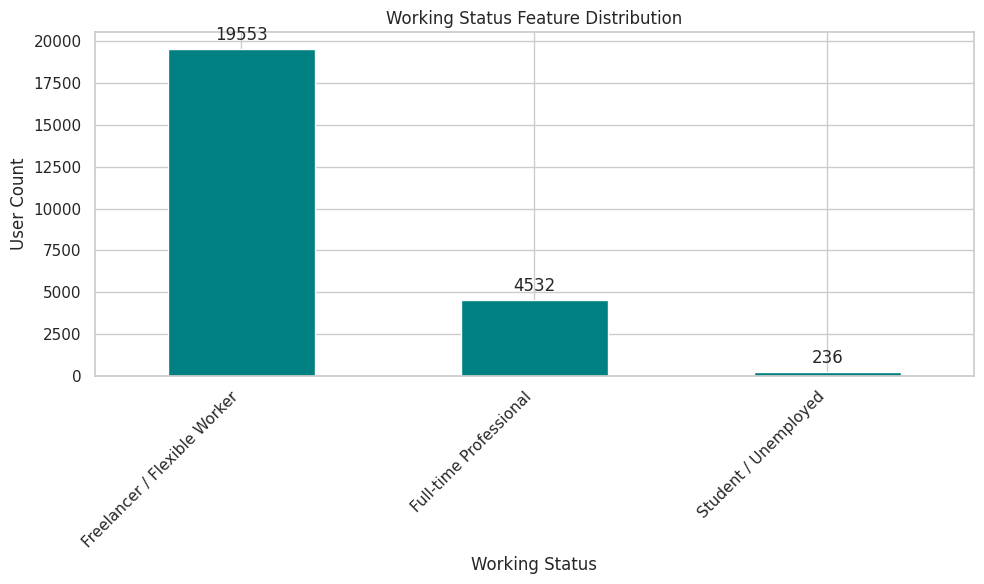

In [36]:
user_work_counts = user_work_df['working_status'].value_counts().sort_values(ascending=False)

ax = user_work_counts.plot(kind='bar', color='teal', figsize=(10, 6))
ax.set_title('Working Status Feature Distribution')
ax.set_xlabel('Working Status')
ax.set_ylabel('User Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [ ]:
merge_df = pd.merge(merge_df, user_work_df[['user_id', 'working_status']], on='user_id', how='left')
merge_df.head()

,transaction_id,user_id,transaction_amount,transaction_date,merchant_id,merchant_name,merchant_category_id,payment_method,loyalty_program,discount_applied,...,merchant_rating,transaction_status,is_refunded,latitude,longitude,device_category,age_feature,gender_feature,income_level,working_status
0,4a71b7d1-34fa-45cf-b40a-a730d16ce617,U10578,23500.0,2024-05-09,M04936,Cox Inc,5732,balance,no,no,...,5,completed,no,-7.974781,112.633863,Android 9,Established Adult,Undetermined,Middle Income,Full-time Professional
1,b29665c0-8373-4ec1-a121-a041c77ffb51,U08353,150500.0,2024-05-30,M06359,"King, Rice and Ramirez",5812,balance,no,no,...,2,completed,no,-6.188155,106.817086,iPhone OS 3,Established Adult,Undetermined,Middle Income,Freelancer / Flexible Worker
2,3e32187b-b374-4f1b-a64e-b1ebcc856563,U04564,65800.0,2024-03-08,M01710,"Lyons, Porter and Williams",5812,credit_card,no,no,...,3,completed,no,-7.962043,112.637274,Android 2,Established Adult,Undetermined,Middle Income,Freelancer / Flexible Worker
3,df8ad42e-aaf6-46d2-8d8f-1e291a4554bd,U22797,45600.0,2024-05-14,M02852,Smith Ltd,5411,balance,no,no,...,3,completed,no,-6.592793,106.806543,iPad OS 9,Established Adult,Undetermined,Middle Income,Freelancer / Flexible Worker
4,334468df-4d71-4e4a-935c-32c17c306611,U18053,8500.0,2024-04-09,M00722,Bush Group,5411,balance,yes,no,...,4,completed,no,-6.269386,106.979043,Android 2,Established Adult,Undetermined,Middle Income,Freelancer / Flexible Worker


## User Segmentation

RFM (Recency, Frequency, Monetary) is a data-driven customer segmentation model that ranks customers based on their purchasing behavior: how recently they bought (Recency), how often they buy (Frequency), and how much they spend (Monetary Value).

Despite having an M (Monetary) score, most marketers use Recency and Frequency as primary indicators of customer relationship health. Monetary scores are typically used as reinforcement (e.g., to differentiate between Big Spenders within the same segment).

In [ ]:
def perform_rfm_analysis(df):
    # Specify Snapshot Date (H+1 from the last transaction)
    snapshot_date = df['transaction_date'].max() + timedelta(days=1)

    # Calculate R, F, M per user_id
    rfm = df.groupby('user_id').agg({
        'transaction_date': lambda x: (snapshot_date - x.max()).days, # Recency
        'transaction_id': 'count',                                   # Frequency
        'transaction_amount': 'sum'                                  # Monetary
    }).reset_index()

    # Rename Column
    rfm.rename(columns={
        'transaction_date': 'Recency',
        'transaction_id': 'Frequency',
        'transaction_amount': 'Monetary'
    }, inplace=True)

    # Using Quintiles (division into 5 equal groups)
    # Note: For Recency, smaller numbers are better (score 5), for F & M larger numbers are better (score 5)

    r_labels = range(5, 0, -1) # 5, 4, 3, 2, 1
    f_labels = range(1, 6)    # 1, 2, 3, 4, 5
    m_labels = range(1, 6)    # 1, 2, 3, 4, 5

    rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5, labels=r_labels)
    rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=f_labels)
    rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=5, labels=m_labels)

    # Combine into one string score (Example: '555' or '111')
    rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

    # Calculate total weight
    rfm['RFM_Total_Sum'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)
    # Simple function for mapping segments based on R and F scores
    def segment_user(df):
        r = int(df['R_Score'])
        f = int(df['F_Score'])

        if r >= 4 and f >= 4:
            return 'Champions'
        elif r >= 2 and f >= 3:
            return 'Loyal Customers'
        elif r >= 3 and f <= 2:
            return 'Potential Loyalists'
        elif r <= 2 and f >= 3:
            return 'At Risk'
        elif r <= 2 and f <= 2:
            return 'Hibernating / Lost'
        else:
            return 'Others'

    rfm['Segment'] = rfm.apply(segment_user, axis=1)

    return rfm

In [ ]:
rfm_result = perform_rfm_analysis(df_new)

print(rfm_result.head())

  user_id  Recency  Frequency   Monetary R_Score F_Score M_Score RFM_Score  \
0  U00001       20         11   514600.0       1       3       3       133   
1  U00002       43          9   259400.0       1       2       1       121   
2  U00003       11         11  1007900.0       2       3       5       235   
3  U00004       20          9   430800.0       1       2       2       122   
4  U00005       34          8   660700.0       1       1       4       114   

   RFM_Total_Sum             Segment  
0              7             At Risk  
1              4  Hibernating / Lost  
2             10     Loyal Customers  
3              5  Hibernating / Lost  
4              6  Hibernating / Lost  


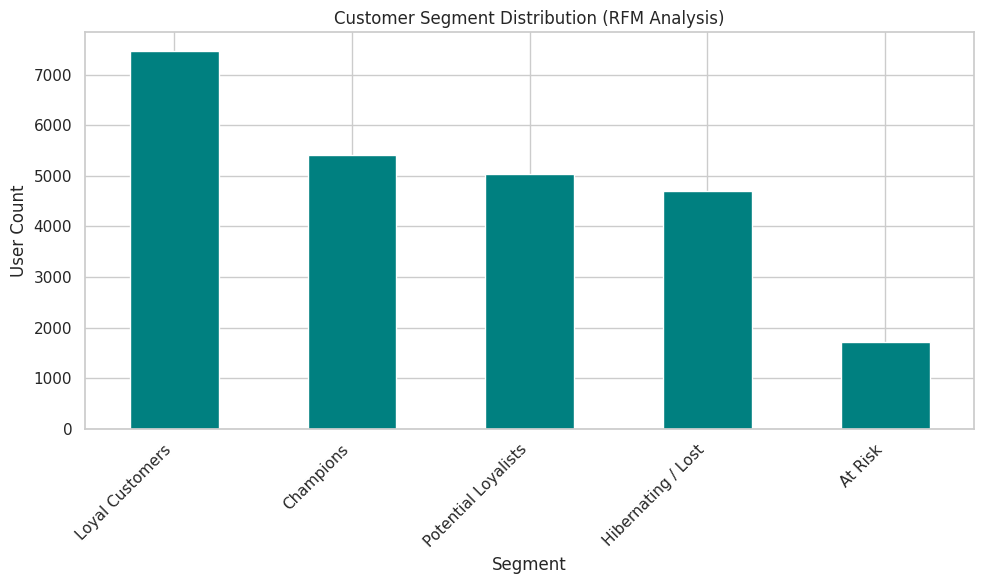

In [ ]:
segment_counts = rfm_result['Segment'].value_counts().sort_values(ascending=False)

ax = segment_counts.plot(kind='bar', color='teal', figsize=(10, 6))
ax.set_title('Customer Segment Distribution (RFM Analysis)')
ax.set_xlabel('Segment')
ax.set_ylabel('User Count')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [ ]:
merge_df = pd.merge(merge_df, rfm_result[['user_id', 'Recency', 'Frequency', 'Monetary']], on='user_id', how='left')
merge_df.head()

,transaction_id,user_id,transaction_amount,transaction_date,merchant_id,merchant_name,merchant_category_id,payment_method,loyalty_program,discount_applied,...,latitude,longitude,device_category,age_feature,gender_feature,income_level,working_status,Recency,Frequency,Monetary
0,4a71b7d1-34fa-45cf-b40a-a730d16ce617,U10578,23500.0,2024-05-09,M04936,Cox Inc,5732,balance,no,no,...,-7.974781,112.633863,Android 9,Established Adult,Undetermined,Middle Income,Full-time Professional,7,10,737900.0
1,b29665c0-8373-4ec1-a121-a041c77ffb51,U08353,150500.0,2024-05-30,M06359,"King, Rice and Ramirez",5812,balance,no,no,...,-6.188155,106.817086,iPhone OS 3,Established Adult,Undetermined,Middle Income,Freelancer / Flexible Worker,2,15,949300.0
2,3e32187b-b374-4f1b-a64e-b1ebcc856563,U04564,65800.0,2024-03-08,M01710,"Lyons, Porter and Williams",5812,credit_card,no,no,...,-7.962043,112.637274,Android 2,Established Adult,Undetermined,Middle Income,Freelancer / Flexible Worker,7,10,588500.0
3,df8ad42e-aaf6-46d2-8d8f-1e291a4554bd,U22797,45600.0,2024-05-14,M02852,Smith Ltd,5411,balance,no,no,...,-6.592793,106.806543,iPad OS 9,Established Adult,Undetermined,Middle Income,Freelancer / Flexible Worker,18,10,426800.0
4,334468df-4d71-4e4a-935c-32c17c306611,U18053,8500.0,2024-04-09,M00722,Bush Group,5411,balance,yes,no,...,-6.269386,106.979043,Android 2,Established Adult,Undetermined,Middle Income,Freelancer / Flexible Worker,16,9,221500.0


In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251504 entries, 0 to 251503
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transaction_id        251504 non-null  object        
 1   user_id               251504 non-null  object        
 2   transaction_amount    251504 non-null  float64       
 3   transaction_date      251504 non-null  datetime64[ns]
 4   merchant_id           251504 non-null  object        
 5   merchant_name         251504 non-null  object        
 6   merchant_category_id  251504 non-null  int64         
 7   payment_method        251504 non-null  object        
 8   loyalty_program       251504 non-null  object        
 9   discount_applied      251504 non-null  object        
 10  promo_amount          251504 non-null  float64       
 11  transaction_notes     251504 non-null  object        
 12  merchant_rating       251504 non-null  int64         
 13 

In [ ]:
final_df = merge_df[['user_id', 'Recency', 'Frequency', 'Monetary', 'age_feature', 'gender_feature', 'income_level', 'working_status']]

final_df.head()

,user_id,Recency,Frequency,Monetary,age_feature,gender_feature,income_level,working_status
0,U10578,7,10,737900.0,Established Adult,Undetermined,Middle Income,Full-time Professional
1,U08353,2,15,949300.0,Established Adult,Undetermined,Middle Income,Freelancer / Flexible Worker
2,U04564,7,10,588500.0,Established Adult,Undetermined,Middle Income,Freelancer / Flexible Worker
3,U22797,18,10,426800.0,Established Adult,Undetermined,Middle Income,Freelancer / Flexible Worker
4,U18053,16,9,221500.0,Established Adult,Undetermined,Middle Income,Freelancer / Flexible Worker


In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans

df_cluster = final_df.copy()

# Ordinal Encoding for features that have levels
encoder = OrdinalEncoder(categories=[
    ['Gen Z / Student', 'Young Professional', 'Established Adult', 'Senior'], # age
    ['Low Income', 'Middle Income', 'High Income'], # income
    ['Student / Unemployed', 'Freelancer / Flexible Worker', 'Full-time Professional'] # work
])

df_cluster[['age_num', 'income_num', 'work_num']] = encoder.fit_transform(
    df_cluster[['age_feature', 'income_level', 'working_status']]
)

In [ ]:
# Log Transformation in RFM
df_cluster['Recency_log'] = np.log1p(df_cluster['Recency'])
df_cluster['Frequency_log'] = np.log1p(df_cluster['Frequency'])
df_cluster['Monetary_log'] = np.log1p(df_cluster['Monetary'])

In [ ]:
features = ['Recency_log', 'Frequency_log', 'Monetary_log', 'age_num', 'income_num', 'work_num']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster[features])

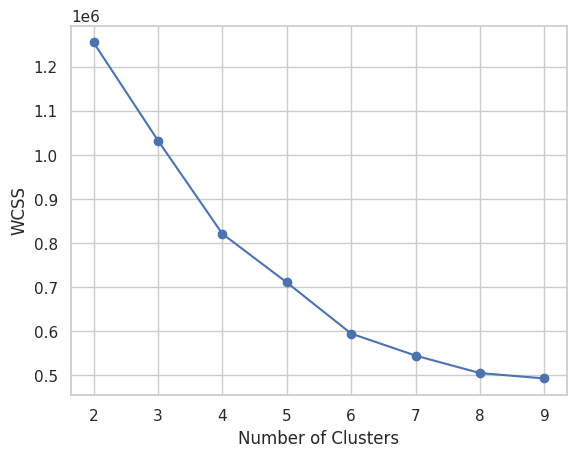

In [ ]:
wcss = []

for i in range(2,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(scaled_features)
  wcss.append(kmeans.inertia_)

plt.plot(range(2,10), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
final_df['Cluster'] = kmeans.fit_predict(scaled_features)

/tmp/ipython-input-85492024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Cluster'] = kmeans.fit_predict(scaled_features)


In [ ]:
final_df.head()

,user_id,Recency,Frequency,Monetary,age_feature,gender_feature,income_level,working_status,Cluster
0,U10578,7,10,737900.0,Established Adult,Undetermined,Middle Income,Full-time Professional,4
1,U08353,2,15,949300.0,Established Adult,Undetermined,Middle Income,Freelancer / Flexible Worker,0
2,U04564,7,10,588500.0,Established Adult,Undetermined,Middle Income,Freelancer / Flexible Worker,5
3,U22797,18,10,426800.0,Established Adult,Undetermined,Middle Income,Freelancer / Flexible Worker,5
4,U18053,16,9,221500.0,Established Adult,Undetermined,Middle Income,Freelancer / Flexible Worker,3


In [ ]:
final_df['Cluster'].value_counts()

,count
Cluster,
0,60989
5,60178
4,45764
3,40325
2,31516
1,12732


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
final_df['PC1'], final_df['PC2'] = principal_components[:, 0], principal_components[:, 1]

/tmp/ipython-input-3468633558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['PC1'], final_df['PC2'] = principal_components[:, 0], principal_components[:, 1]
/tmp/ipython-input-3468633558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['PC1'], final_df['PC2'] = principal_components[:, 0], principal_components[:, 1]


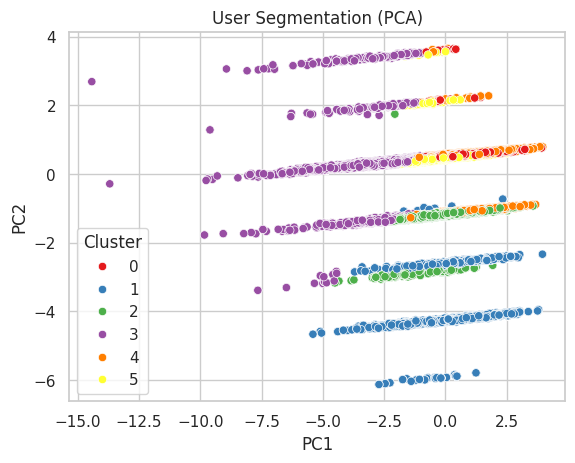

In [ ]:
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=final_df, palette='Set1')
plt.title('User Segmentation (PCA)')
plt.show()

In [ ]:
summary = final_df.groupby('Cluster').agg({
    'user_id': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'age_feature': lambda x: x.mode()[0],
    'income_level': lambda x: x.mode()[0],
    'working_status': lambda x: x.mode()[0]
}).rename(columns={'user_id': 'Total_Users'})

print(summary)

         Total_Users    Recency  Frequency       Monetary         age_feature  \
Cluster                                                                         
0              60989   3.101002  12.833183  660615.281444   Established Adult   
1              12732   9.367656  11.208294  623937.213321  Young Professional   
2              31516   8.928354  11.679211  571764.570377  Young Professional   
3              40325  13.593329   7.275164  286983.179169   Established Adult   
4              45764   8.252207  12.575343  640295.826414   Established Adult   
5              60178  14.377879  11.428795  596083.420851   Established Adult   

          income_level                working_status  
Cluster                                               
0        Middle Income  Freelancer / Flexible Worker  
1          High Income  Freelancer / Flexible Worker  
2        Middle Income  Freelancer / Flexible Worker  
3        Middle Income  Freelancer / Flexible Worker  
4        Middle Incom

Based on the profile results above, the following is a mapping of the unique characteristics of each group.
- Cluster 0: The Most Active Mid-Market (Most Valuable)

  They have the lowest Recency (3.1 days), meaning they are the most recent and frequent transacting group. Their Frequency (12.8) and Monetary are the highest among all clusters. This is the "heart" segment of the business. Despite their freelance status, they are highly active and have significant expenses.
- Cluster 1: The High-Income Young Elite

  Has high Monetary even though the number of users is the smallest (exclusive group). They have high purchasing power but may be more selective or transact less frequently than Cluster 0.
- Cluster 2: The Steady Mid-StreamERS

  It is at the mid-level for all RFM metrics. A group of young professionals who are building their careers. They are the future of Cluster 4 or Cluster 1.
- Cluster 3: The Low-Engagement Segment

  It has the smallest Frequency (7.2) and Monetary values among all clusters. Its recency is also quite long (13.5 days). The least active segment. They may just be trying out the service or only showing up when there's a big promotion that's highly relevant to them.
- Cluster 4: The Loyal Professionals

  Similar to Cluster 0 in terms of Frequency (12.5) and Monetary, but slightly less recent in terms of transactions (Recency 8.2 days). This group consists of established office workers. They tend to have stable and predictable spending patterns.
- Cluster 5: The Occasional Established Buyers

  They have the highest Recency (14.3 days), meaning they haven't made a transaction in a while. However, when they do make a purchase, their transaction value is quite large. Established customers who shop only when needed (utility shoppers).